In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def rgb2gray(rgb):
    r,g,b = rgb[:, :, 0], rgb[:,:,1], rgb[:, :, 2]
    gray = 0.2989*r + 0.5870*g + 0.1140*b
    return gray

In [ ]:
def load_image(path):
  img = Image.open(path)
  img = img.resize((256, 256))
  img = np.array(img)
  return rgb2gray(img)

In [ ]:
img = load_image('/content/city.jpg')
print(img.shape)

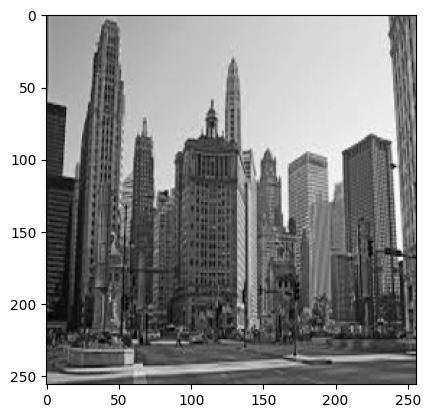

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
def Conv2D(image, kernel):
  m, n = kernel.shape
  if m==n:
    x, y = image.shape
    x = x-m+1
    y = y-m+1
    output = np.zeros((x,y))
    for i in range (x):
      for j in range(y):
        output[i][j] = np.sum(image[i:i+m, j:j+m] * kernel)
    return output

In [ ]:
kernel = np.array([ 
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
 ])

In [ ]:
conv_output = Conv2D(img, kernel)
conv_output.shape

(254, 254)

<function matplotlib.pyplot.show(close=None, block=None)>

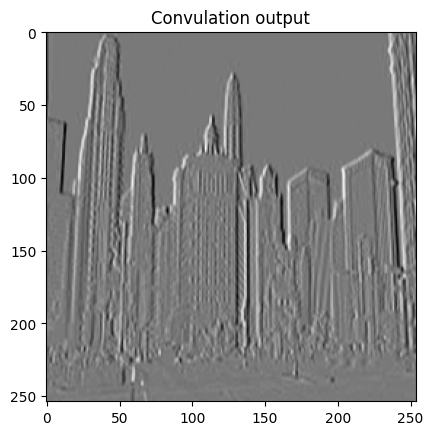

In [ ]:
plt.imshow(conv_output, cmap='gray')
plt.title("Convulation output")
plt.show

In [ ]:
def Maxpool2D(image, pool_size):
  x, y = image.shape
  x = x//pool_size
  y = y//pool_size

  output = np.zeros((x,y))

  for i in range(x):
    for j in range(y):
      output[i][j] = np.max(image[i*pool_size: i*pool_size + pool_size,
                                  j*pool_size: j*pool_size + pool_size])
  return output

In [ ]:
maxpool_output = Maxpool2D(conv_output, 2)
maxpool_output.shape

(127, 127)

<function matplotlib.pyplot.show(close=None, block=None)>

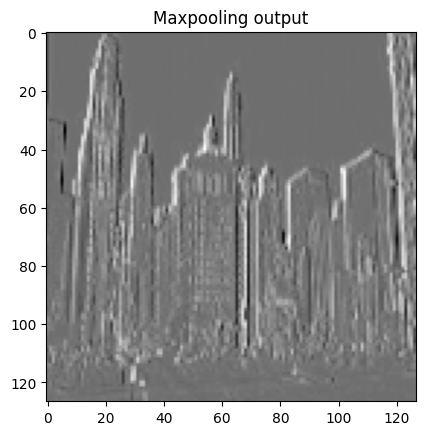

In [ ]:
plt.imshow(maxpool_output, cmap='gray')
plt.title("Maxpooling output")
plt.show

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras import datasets, layers, models, losses, optimizers
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
classes = np.unique(train_labels)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
nClasess = len(classes)
nClasess

10

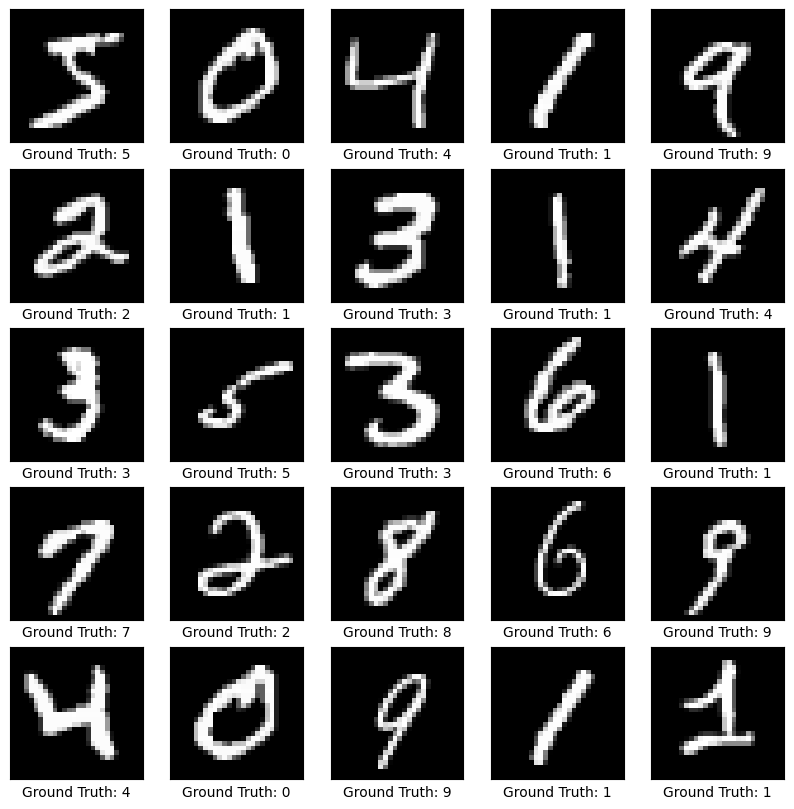

In [ ]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  # plt.grid(False)
  plt.imshow(train_images[i], cmap='gray')
  plt.xlabel(f'Ground Truth: {classes[train_labels[i]]}')
plt.show()

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_labels[0]

5

In [ ]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
train_labels_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(
    train_images, train_labels_one_hot, 
    train_size = 0.8, shuffle = True
)

In [ ]:
train_X.shape, valid_X.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
# model.add(tensorflow.keras.applications.ResNet50(
#     include_top = True,
#     weights = "imagenet",
#     input_shape =  (224, 224, 3),
#     pooling = None,
#     classes = 1000
# ))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
batch_size = 64
epochs = 5

model.compile(loss = losses.CategoricalCrossentropy(), 
              optimizer = optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
training_history = model.fit(train_X, train_y,
                             batch_size = batch_size, 
                             epochs = epochs,
                             validation_data = (valid_X, valid_y)
                             )


Epoch 1/5
750/750 [==============================] - 15s 5ms/step - loss: 0.2954 - accuracy: 0.9100 - val_loss: 0.1395 - val_accuracy: 0.9594
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0910 - accuracy: 0.9717 - val_loss: 0.0695 - val_accuracy: 0.9795
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0570 - val_accuracy: 0.9841
Epoch 4/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0516 - accuracy: 0.9838 - val_loss: 0.0599 - val_accuracy: 0.9818
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0477 - val_accuracy: 0.9860


In [ ]:
training_history.history



1.   Run the same code for 5 epochs
2.   Plot training vs validation, accuracy and loss
3.   Calculate test accuracy



In [ ]:
history = training_history

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions = np.argmax(predictions, axis=1)

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, test_labels) * 100

98.77